# TM Final project:

## Title:

Name:Omid Lavakhamseh

LIU-ID: omila405


#### import needed libraries: 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,fbeta_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Reading the data :

In [11]:
email=pd.read_csv('spam_assassin.csv')
email
plt.show()


In [12]:

#plt.savefig('M:/LIU/TM/project/Final Work/original_data_table.png')
#fig.savefig('table.png', bbox_inches='tight', pad_inches=0.5)

In [13]:
email.rename(columns = {'text':'body'}, inplace = True)
email.rename(columns = {'target':'label'}, inplace = True)

In [14]:
email.head()

,body,label
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [15]:
print(email.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    5796 non-null   object
 1   label   5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB
None


#### Preprocessing:


<AxesSubplot:xlabel='label', ylabel='count'>

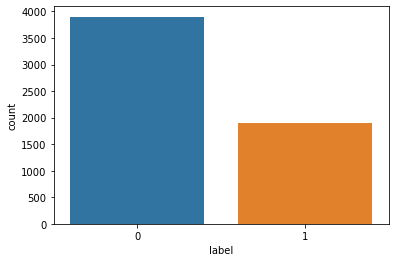

In [16]:
sns.countplot(email['label'])
#plt.savefig('M:/LIU/TM/project/Final Work/test_graph.png')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/sotun.jpg', dpi=300, bbox_inches='tight')


In [17]:
print('number of one labels',sum(email['label']==1))
print('number of zero labels',sum(email['label']==0))

number of one labels 1896
number of zero labels 3900


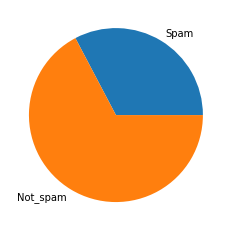

In [20]:
lab=['Spam','Not_spam']
count=[sum(email['label']==1),sum(email['label']==0)]
plt.pie(count,labels=lab)
#fig = ax.get_figure()
#fig.set_size_inches(8, 8)
plt.show()
#plt.savefig(, bbox_inches='tight')
#plt.savefig('M:/LIU/TM/project/Final Work/gerd3.jpg', dpi=300, bbox_inches='tight')


##### A)there is not any missing value 

In [21]:
print(email.isnull().sum())

body     0
label    0
dtype: int64


##### B)
Now we need to check if all charachters are lower or not because for example 'YES' and 'yes' both refer to the same concept but my model would consider them different.

In [22]:
print('Are all letters lower case in body column?',str(email['body']).islower())



Are all letters lower case in body column? False


AS we see we have a combination of lower and upper case in subject and email columns so we need to change them to the same format because of the reason that mentioned above.  

In [23]:
email['body']=email['body'].str.upper()

In [24]:
email#new form of data

,body,label
0,FROM ILUG-ADMIN@LINUX.IE MON JUL 29 11:28:02 2...,0
1,FROM GORT44@EXCITE.COM MON JUN 24 17:54:21 200...,1
2,FROM FORK-ADMIN@XENT.COM MON JUL 29 11:39:57 2...,1
3,FROM DCM123@BTAMAIL.NET.CN MON JUN 24 17:49:23...,1
4,FROM ILUG-ADMIN@LINUX.IE MON AUG 19 11:02:47 2...,0
...,...,...
5791,FROM ILUG-ADMIN@LINUX.IE MON JUL 22 18:12:45 2...,0
5792,FROM FORK-ADMIN@XENT.COM MON OCT 7 20:37:02 20...,0
5793,RECEIVED: FROM HQ.PRO-NS.NET (LOCALHOST [127.0...,1
5794,FROM RAZOR-USERS-ADMIN@LISTS.SOURCEFORGE.NET T...,0


In [25]:
#test all are upper now at last

## Feature extraction:


In [26]:
email["body"].apply(lambda X: " ".join(nltk.word_tokenize(X)))

0       FROM ILUG-ADMIN @ LINUX.IE MON JUL 29 11:28:02...
1       FROM GORT44 @ EXCITE.COM MON JUN 24 17:54:21 2...
2       FROM FORK-ADMIN @ XENT.COM MON JUL 29 11:39:57...
3       FROM DCM123 @ BTAMAIL.NET.CN MON JUN 24 17:49:...
4       FROM ILUG-ADMIN @ LINUX.IE MON AUG 19 11:02:47...
                              ...                        
5791    FROM ILUG-ADMIN @ LINUX.IE MON JUL 22 18:12:45...
5792    FROM FORK-ADMIN @ XENT.COM MON OCT 7 20:37:02 ...
5793    RECEIVED : FROM HQ.PRO-NS.NET ( LOCALHOST [ 12...
5794    FROM RAZOR-USERS-ADMIN @ LISTS.SOURCEFORGE.NET...
5795    FROM RSSFEEDS @ JMASON.ORG MON SEP 30 13:44:10...
Name: body, Length: 5796, dtype: object

In [27]:
# Data preprocessing
email["body"] = email["body"].apply(lambda X: " ".join(nltk.word_tokenize(X)))


# Feature extraction
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(email["body"])
Y = email["label"]

In [28]:
email['body']

0       FROM ILUG-ADMIN @ LINUX.IE MON JUL 29 11:28:02...
1       FROM GORT44 @ EXCITE.COM MON JUN 24 17:54:21 2...
2       FROM FORK-ADMIN @ XENT.COM MON JUL 29 11:39:57...
3       FROM DCM123 @ BTAMAIL.NET.CN MON JUN 24 17:49:...
4       FROM ILUG-ADMIN @ LINUX.IE MON AUG 19 11:02:47...
                              ...                        
5791    FROM ILUG-ADMIN @ LINUX.IE MON JUL 22 18:12:45...
5792    FROM FORK-ADMIN @ XENT.COM MON OCT 7 20:37:02 ...
5793    RECEIVED : FROM HQ.PRO-NS.NET ( LOCALHOST [ 12...
5794    FROM RAZOR-USERS-ADMIN @ LISTS.SOURCEFORGE.NET...
5795    FROM RSSFEEDS @ JMASON.ORG MON SEP 30 13:44:10...
Name: body, Length: 5796, dtype: object

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omidl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords

In [36]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#text = "This is an example sentence to demonstrate stopword removal."
stop_words = set(stopwords.words('english'))

#tokens = word_tokenize(text)
filtered_not_spam = [word for word in email[email['label'] == 0]['body'] if word.upper() not in stop_words]

filtered_not_spam = ' '.join(filtered_not_spam)
#print(filtered_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omidl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
len(filtered_not_spam)

14519081

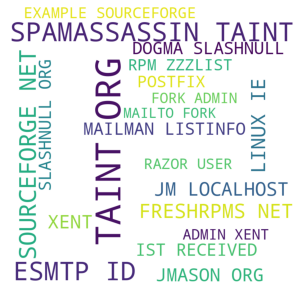

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#text = "This is an example sentence to demonstrate stopword removal."
#stop_words = set(stopwords.words('english'))

#tokens = word_tokenize(text)
#filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

#filtered_text = ' '.join(filtered_tokens)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10,max_words=20).generate(filtered_not_spam)

plt.figure(figsize = (100, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.savefig('M:/LIU/TM/project/Final Work/frequent_notspam.png', dpi=300, bbox_inches='tight')
#plt.show() 


In [39]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



#tokens = word_tokenize(text)
filtered_spam = [word for word in email[email['label'] == 1]['body'] if word.upper() not in stop_words]

filtered_spam = ' '.join(filtered_spam)
#print(filtered_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omidl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
len(filtered_spam)

12069953

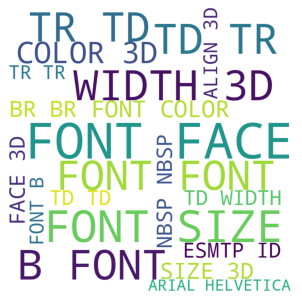

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10,max_words=20).generate(filtered_spam)

plt.figure(figsize = (100, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.savefig('M:/LIU/TM/project/Final Work/frequent_spam.png', dpi=300, bbox_inches='tight')
#plt.show() 


This code generates two word clouds, one for each class, based on the most frequent words in the text data. You can adjust the parameters of the WordCloud object to customize the appearance of the word clouds.

##### C)  data partitioning:
I am going to split data to train, validation and test respectively 60%,20%,20%.



In [42]:
#X=email[['body']]
X

<5796x132244 sparse matrix of type '<class 'numpy.float64'>'
	with 1244235 stored elements in Compressed Sparse Row format>

In [43]:
#Y=email[['label']]
Y

0       0
1       1
2       1
3       1
4       0
       ..
5791    0
5792    0
5793    1
5794    0
5795    0
Name: label, Length: 5796, dtype: int64

In [44]:
random.seed(0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)

In [45]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.25)

In [46]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)
print("X_val: ",X_val.shape)
print("Y_val:",Y_val.shape)
print('proportion of train {:.2f} '.format(len(Y_train)/email.shape[0]))
print('proportion of validation {:.2f}'.format(len(Y_val)/email.shape[0]))
print('proportion of test {:.2f} ' .format(len(Y_test)/email.shape[0]))

X_train: (3477, 132244)
X_test:  (1160, 132244)
Y_train: (3477,)
Y_test: (1160,)
X_val:  (1159, 132244)
Y_val: (1159,)
proportion of train 0.60 
proportion of validation 0.20
proportion of test 0.20 


# 4.Modeling:


## 4.1 using SVC model

In [74]:
# Model training
model = SVC(kernel="linear")
model.fit(X_train, Y_train)

# Model evaluation
Y_pred = model.predict(X_val)
Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 0.9976272648835203
Accuracy: 0.994823123382226
Precision: 0.9973958333333334
Recall: 0.9871134020618557
F1 score: 0.9922279792746115


In [75]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[770   1]
 [  5 383]]


Text(33.0, 0.5, 'True Labels')

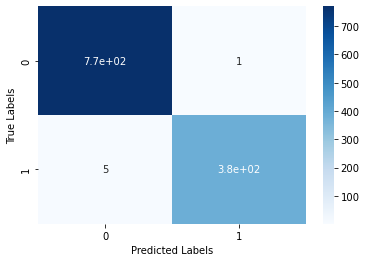

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_SVC.jpg', dpi=300, bbox_inches='tight')


# MultinomialNB

In [50]:
from sklearn.naive_bayes import MultinomialNB



# Model training
model = MultinomialNB()
model.fit(X_train, Y_train)

# Model evaluation
Y_pred = model.predict(X_val)
Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 0.9209088294506759
Accuracy: 0.8964624676445211
Precision: 0.9962962962962963
Recall: 0.6932989690721649
F1 score: 0.8176291793313071


In [51]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[770   1]
 [119 269]]


Text(33.0, 0.5, 'True Labels')

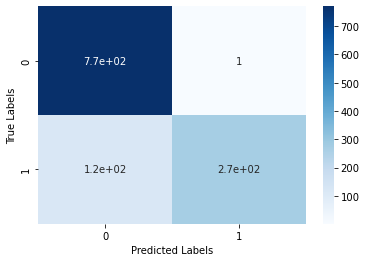

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_multinomialNB.jpg', dpi=300, bbox_inches='tight')


# RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Model evaluation
Y_pred = model.predict(X_val)
Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 1.0
Accuracy: 0.9836065573770492
Precision: 0.9893899204244032
Recall: 0.961340206185567
F1 score: 0.9751633986928105


In [54]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[767   4]
 [ 15 373]]


Text(33.0, 0.5, 'True Labels')

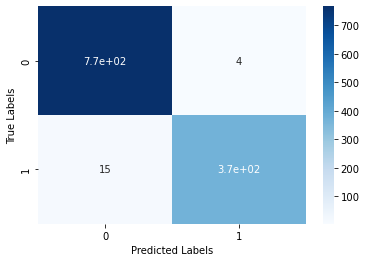

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_RandomForestClassifier.jpg', dpi=300, bbox_inches='tight')


# AdaBoostClassifier

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the email dataset
#df = pd.read_csv('email_dataset.csv')

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorize the emails using a CountVectorizer
#vectorizer = CountVectorizer(stop_words='english')
#X_train_vec = vectorizer.fit_transform(X_train)
#X_test_vec = vectorizer.transform(X_test)

# Train an AdaBoost classifier on the training data
base_classifier = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=200, learning_rate=0.5, random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
Y_pred_tr = clf.predict(X_train)
# Evaluate the performance of the classifier on the testing data
#accuracy = clf.score(Y_train, y_test)
#print('Accuracy:', accuracy)
# Model evaluation
#Y_pred = model.predict(X_val)
#Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 1.0
Accuracy: 0.999137187230371
Precision: 1.0
Recall: 0.9974226804123711
F1 score: 0.9987096774193548


In [63]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[771   0]
 [  1 387]]


Text(33.0, 0.5, 'True Labels')

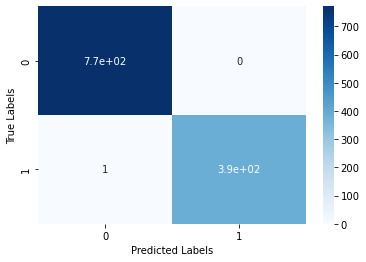

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_RandomForestClassifier.jpg', dpi=300, bbox_inches='tight')


In [65]:
# Train a Decision Tree classifier on the training data
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
Y_pred_tr = clf.predict(X_train)
# Evaluate the performance of the classifier on the testing data
#accuracy = clf.score(Y_train, y_test)
#print('Accuracy:', accuracy)
# Model evaluation
#Y_pred = model.predict(X_val)
#Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 0.9937446074201898
Accuracy: 0.993960310612597
Precision: 0.9948051948051948
Recall: 0.9871134020618557
F1 score: 0.9909443725743855


Furher work , a larger datset can be used to train and test.

# The best model

In [56]:
random.seed(0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)

In [57]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

print('proportion of train {:.2f} '.format(len(Y_train)/email.shape[0]))

print('proportion of test {:.2f} ' .format(len(Y_test)/email.shape[0]))

X_train: (4636, 132244)
X_test:  (1160, 132244)
Y_train: (4636,)
Y_test: (1160,)
proportion of train 0.80 
proportion of test 0.20 


In [58]:
# Model training
model = SVC(kernel="linear")
model.fit(X_train, Y_train)

# Model evaluation
Y_pred = model.predict(X_val)
Y_pred_tr = model.predict(X_train)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 0.9976272648835203
Accuracy: 0.994823123382226
Precision: 0.9973958333333334
Recall: 0.9871134020618557
F1 score: 0.9922279792746115


In [59]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)

[[770   1]
 [  5 383]]


Text(33.0, 0.5, 'True Labels')

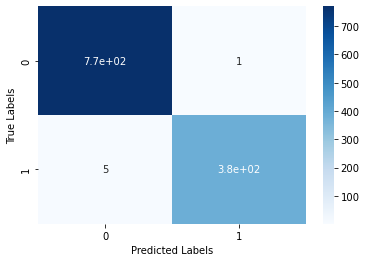

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/bestclassifier.jpg', dpi=300, bbox_inches='tight')


## Refrence:
https://www.malicksarr.com/

https://www.geeksforgeeks.org/

https://scikit-learn.org/

https://www.statology.org/

https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704